## Part 1: Regression on California Test Scores

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv')
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [3]:
# Drop the extra score
df.drop(columns=['readscr','mathscr','Unnamed: 0'],inplace = True)

### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distcod   420 non-null    int64  
 1   county    420 non-null    object 
 2   district  420 non-null    object 
 3   grspan    420 non-null    object 
 4   enrltot   420 non-null    int64  
 5   teachers  420 non-null    float64
 6   calwpct   420 non-null    float64
 7   mealpct   420 non-null    float64
 8   computer  420 non-null    int64  
 9   testscr   420 non-null    float64
 10  compstu   420 non-null    float64
 11  expnstu   420 non-null    float64
 12  str       420 non-null    float64
 13  avginc    420 non-null    float64
 14  elpct     420 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 49.3+ KB


Text(0.5, 1.0, 'Distribution of Test Score')

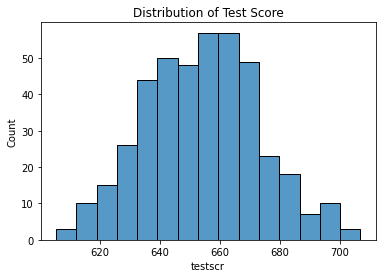

In [5]:
# Histogram of the target
sns.histplot(df.testscr)
plt.title('Distribution of Test Score')

Text(0.5, 1.0, 'Distribution of compstu')

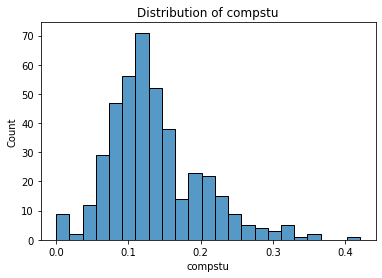

In [6]:
sns.histplot(df.compstu)
plt.title('Distribution of compstu')

Text(0.5, 1.0, 'Distribution of expnstu')

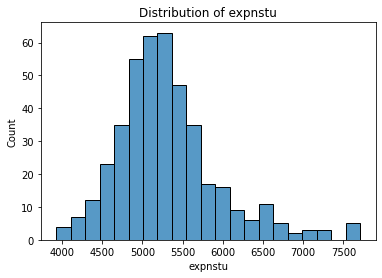

In [7]:
sns.histplot(df.expnstu)
plt.title('Distribution of expnstu')


Text(0.5, 1.0, 'Distribution of calwpct')

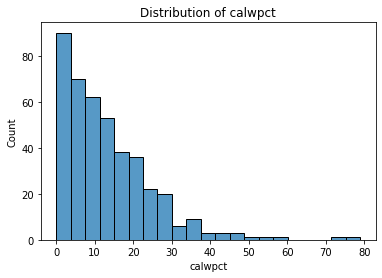

In [ ]:
sns.histplot(df.calwpct)
plt.title('Distribution of calwpct')


### 1.2 Visualize the dependency of the target on each feature from 1.1.

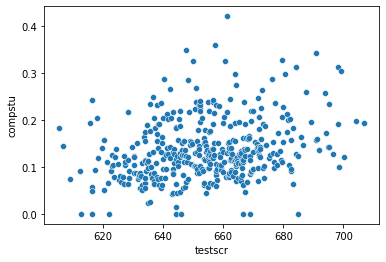

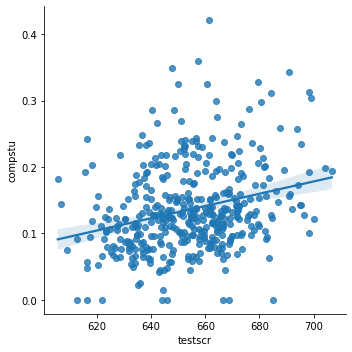

In [ ]:
sns.scatterplot(data=df, x="testscr", y="compstu")
sns.lmplot(data=df, x="testscr", y="compstu")

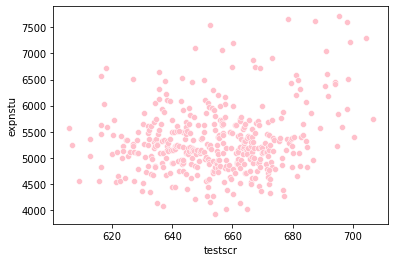

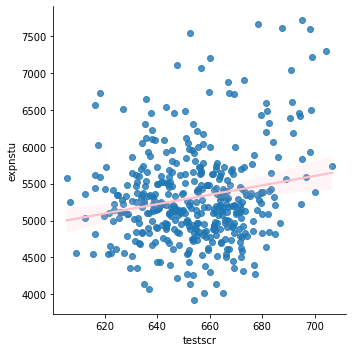

In [ ]:
sns.scatterplot(data=df, x="testscr", y="expnstu",color = 'pink')
sns.lmplot(data=df, x="testscr", y="expnstu", line_kws={'color': 'pink'})

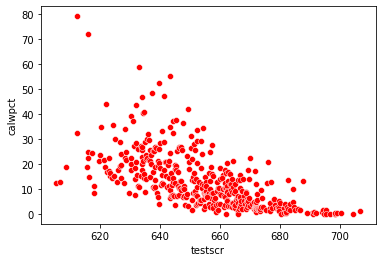

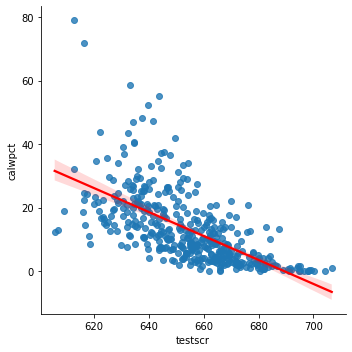

In [ ]:
sns.scatterplot(data=df, x="testscr", y="calwpct",color = 'r')
sns.lmplot(data=df, x="testscr", y="calwpct", line_kws={'color': 'r'})

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

### 1.3 a Unscaled Data

In [8]:
# drop unnecessary columns
df = df.iloc[:, 4:]

In [9]:
df.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [10]:
# Split data in training and test set
from sklearn.model_selection import train_test_split

y = df['testscr']
X = df.loc[:, df.columns != 'testscr']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

X.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [11]:
# import cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assign K-Fold
kfold = KFold()

K-nearest neighbors regressor with cross validation

In [12]:
# K-nearest neighbors (default) regressor with Cross Validation (default)
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print("The training dataset has score: {:.2f}".format(knn.score(X_train, y_train)))
print("The test dataset has score: {:.2f}".format(knn.score(X_test, y_test)))
print("K-Fold:\n{}".format(cross_val_score(knn, X_train,y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))
#y_pred = knn.predict(X_test)



The training dataset has score: 0.30
The test dataset has score: 0.08
K-Fold:
[-0.28842695 -0.02010055  0.01334392 -0.09919401  0.12442687]
The mean of K-Fold:
-0.05399014482377125


Linear Regression (OLS) with cross validation

In [13]:
# Linear Regression (OLS)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print("The training dataset has score: {:.2f}".format(lr.score(X_train, y_train)))
print("The test dataset has score: {:.2f}".format(lr.score(X_test, y_test)))
print("K-Fold:\n{}".format(cross_val_score(lr, X_train, y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(lr, X_train, y_train, cv=kfold))))

The training dataset has score: 0.81
The test dataset has score: 0.81
K-Fold:
[0.83368205 0.80221441 0.71553753 0.78819713 0.76387926]
The mean of K-Fold:
0.7807020742805933


Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
print("The training dataset has score: {:.2f}".format(ridge.score(X_train, y_train)))
print("The test dataset has score: {:.2f}".format(ridge.score(X_test, y_test)))
print("K-Fold:\n{}".format(cross_val_score(ridge, X_train, y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(ridge, X_train, y_train, cv=kfold))))

The training dataset has score: 0.81
The test dataset has score: 0.81
K-Fold:
[0.83368442 0.80335391 0.71572805 0.79631673 0.76436838]
The mean of K-Fold:
0.7826902950593004


Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

# ignore warning
import warnings
warnings.filterwarnings("ignore")

lasso = Lasso().fit(X_train, y_train)
print("The training dataset has score: {:.2f}".format(lasso.score(X_train, y_train)))
print("The test dataset has score: {:.2f}".format(lasso.score(X_test, y_test)))
print("K-Fold:\n{}".format(cross_val_score(lasso, X_train, y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(lasso, X_train, y_train, cv=kfold))))

#print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

The training dataset has score: 0.80
The test dataset has score: 0.81
K-Fold:
[0.84215024 0.80270275 0.71631566 0.80231838 0.7704429 ]
The mean of K-Fold:
0.78678598396409


### 1.3 b Does scaling the data with the StandardScaler help?

In [15]:
# Using StandardScaler() to standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)   
X_test_scaled = scaler.transform(X_test)                      

In [16]:
# K-nearest neighbors (default) regressor with Cross Validation (default)
# Scaled
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

print("The training dataset has score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("The test dataset has score: {:.2f}".format(knn.score(X_test_scaled, y_test)))
print("K-Fold:\n{}".format(cross_val_score(knn,X_train_scaled, y_train,cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))))

The training dataset has score: 0.81
The test dataset has score: 0.77
K-Fold:
[0.68846149 0.74167355 0.65958402 0.74652763 0.71945377]
The mean of K-Fold:
0.7111400899098531


#### Comparing KNN Regressor: The unscaled (cross validation) is -0.054, and scaled (cross validation) is 0.711.
#### Improved.

In [17]:
# Linear Regression (OLS)
# Scaled

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("The training dataset has score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("The test dataset has score: {:.2f}".format(lr.score(X_test_scaled, y_test)))
print("K-Fold:\n{}".format(cross_val_score(lr, X_train_scaled, y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(lr, X_train_scaled, y_train, cv=kfold))))

The training dataset has score: 0.81
The test dataset has score: 0.81
K-Fold:
[0.83368205 0.80221441 0.71553753 0.78819713 0.76387926]
The mean of K-Fold:
0.7807020742805932


#### Comparing Linear Regression: The unscaled score (cross validation) is 0.781, and scaled score (cross validation) is 0.781.
#### Not Improved.

In [18]:
# Ridge
# Scaled

ridge = Ridge().fit(X_train_scaled, y_train)
print("The training dataset has score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("The test dataset has score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))
print("K-Fold:\n{}".format(cross_val_score(ridge, X_train_scaled, y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=kfold))))

The training dataset has score: 0.81
The test dataset has score: 0.81
K-Fold:
[0.83430309 0.80175798 0.71730092 0.79028024 0.7736127 ]
The mean of K-Fold:
0.7834509841384872


#### Comparing Ridge Regression: The unscaled (cross validation) is 0.783, and scaled (cross validation) is 0.783.
#### Not Improved.

In [21]:
# Lasso
# Scaled

lasso = Lasso().fit(X_train_scaled, y_train)
print("The training dataset has score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("The test dataset has score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
print("K-Fold:\n{}".format(cross_val_score(lasso, X_train_scaled, y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=kfold))))


The training dataset has score: 0.80
The test dataset has score: 0.79
K-Fold:
[0.84356301 0.80485383 0.73287244 0.78490019 0.75579764]
The mean of K-Fold:
0.784397424132983


#### Comparing Lasso Regression: The unscaled score (cross validation) is 0.787, and scaled score (cross validation) is 0.783.
#### Similar, slightly improved. 
#### not really improved.

## 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [22]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [23]:
#KNN Regressor with Grid Search
knn_pipe_reg = make_pipeline(StandardScaler(), KNeighborsRegressor())

param_grid = {'kneighborsregressor__n_neighbors': np.arange(0, 19, 3)}
knn_grid = GridSearchCV(knn_pipe_reg, param_grid=param_grid, cv=kfold)

knn_grid.fit(X_train_scaled, y_train)
print("The best parameter is: \n{}".format(knn_grid.best_params_['kneighborsregressor__n_neighbors']))
print("The best parameter provides test score: \n{:.4f}".format(knn_grid.score(X_test_scaled, y_test)))

The best parameter is: 
12
The best parameter provides test score: 
0.7602


Do the KNN results improve?: Improved from 0.711 to 0.760

Linear Regression has no hyper-parameter.

In [24]:
#Ridge Regressor with Grid Search

# Ridge Regression with Grid Search
#ridge_param_grid = {'alpha':  np.logspace(-3,3,10)}
#ridge_pipe = make_pipeline(StandardScaler(), GridSearchCV(Ridge(),param_grid = ridge_param_grid, return_train_score=True,cv=kfold))
#grid = GridSearchCV(ridge_pipe_reg, param_grid=param_grid, cv=kfold)
#ridge_pipe.fit(X_train_scaled, y_train)
#results = ridge_pipe.named_steps['gridsearchcv']
#print("The best parameter is: \n{}".format(results.best_params_))
#print("The best parameter provides test score: \n{:.4f}".format(results.best_score_))


ridge_pipe_reg = make_pipeline(StandardScaler(), Ridge())

param_grid_ridge = {'ridge__alpha': np.logspace(-3,3,10)}
ridge_grid = GridSearchCV(ridge_pipe_reg, param_grid=param_grid_ridge, cv=kfold)

ridge_grid.fit(X_train_scaled, y_train)
print("The best parameter is: \n{}".format(ridge_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(ridge_grid.score(X_test_scaled, y_test)))

The best parameter is: 
{'ridge__alpha': 10.0}
The best parameter provides test score: 
0.8045


Do the Ridge results improve?: Improved from 0.783 to 0.8045

In [25]:
# Lasso Regressor with Grid Search

lasso_pipe_reg = make_pipeline(StandardScaler(), Lasso())

param_grid_lasso = {'lasso__alpha': np.logspace(-3,3,10)}
lasso_grid = GridSearchCV(lasso_pipe_reg, param_grid=param_grid_lasso, cv=kfold)

lasso_grid.fit(X_train_scaled, y_train)
print("The best parameter is: \n{}".format(lasso_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(lasso_grid.score(X_test_scaled, y_test)))

The best parameter is: 
{'lasso__alpha': 0.46415888336127775}
The best parameter provides test score: 
0.7989


Do the Lasso results improve?: Improved (slightly) from 0.784 to 0.799

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

The two best linear models are Ridge Regression and Lasso Regression.

In [26]:
coef_df_lasso = pd.DataFrame(data = lasso.coef_, index = X_train.columns, columns = ['Lasso'])
coef_df_lasso['Feature Not Used'] = coef_df_lasso['Lasso'].apply(lambda x: True if (x  == 0) else False)
coef_df_ridge = pd.DataFrame(data = ridge.coef_, index = X_train.columns, columns = ['Ridge'])
pd.concat([coef_df_lasso, coef_df_ridge], axis=1)


,Lasso,Feature Not Used,Ridge
enrltot,-0.000000,True,0.072695
teachers,-0.000000,True,-0.928104
calwpct,-0.000000,True,-1.242371
mealpct,-10.639962,False,-9.656039
computer,-0.000000,True,0.944688
compstu,0.000000,True,-0.080996
expnstu,0.458524,False,1.157061
str,-0.227045,False,-0.639715
avginc,3.323632,False,3.738845
elpct,-2.556799,False,-3.522555


In the coefficient table above, Lasso Regression has 8 features remained and two features (**compstu** and **str**) reduced the coefficients to zero, which means these two features are not that important to the target. The ridge regression also shrunk the coefficients, but there are no features that have zero coefficients.


**Mealpct** in both regression models have negative relationship, and **avginc** has positive relationship.

## 1.6 Discuss which final model you would choose to predict new data

I will choose the Ridge Regression (alpha = 10), since it has the highest score (0.8045)

# Part 2: Classification on red and white wine characteristics

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
PATH_TO_DATASET_RED = '/content/drive/MyDrive/Colab Notebooks/HW2/winequality-red.csv' 
PATH_TO_DATASET_WHITE = '/content/drive/MyDrive/Colab Notebooks/HW2/winequality-white.csv' 
############################################################

df_red = pd.read_csv(PATH_TO_DATASET_RED,sep=';')
df_white = pd.read_csv(PATH_TO_DATASET_WHITE,sep=';')
df_red['winetype'] = 1
df_white['winetype'] = 0
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [29]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [30]:
df_white.shape

(4898, 13)

In [31]:
df_wine = pd.concat([df_red,df_white])
df_wine.shape

(6497, 13)

In [32]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

In [33]:
# target is wine type
# view the dtype of data
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  winetype              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Text(0.5, 1.0, 'Volatile acidity in different types of wines')

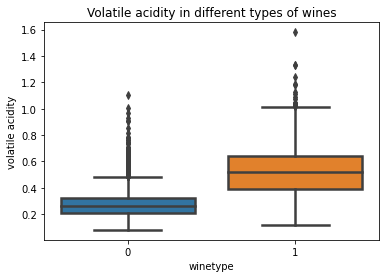

In [ ]:
sns.boxplot(x='winetype', y='volatile acidity', data=df_wine,linewidth=2.5,labels = ['winetype'])
plt.title('Volatile acidity in different types of wines')
# left (0) is white
# right (1) is white

Text(0.5, 1.0, 'Free sulfur dioxide in different types of wines')

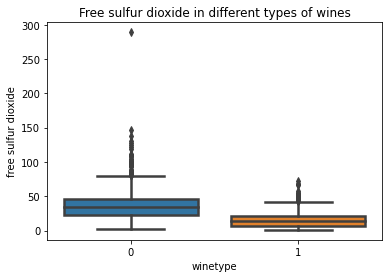

In [ ]:
sns.boxplot(x='winetype', y='free sulfur dioxide', data=df_wine,linewidth=2.5,labels = ['winetype'])
plt.title('Free sulfur dioxide in different types of wines')
# left (0) is white
# right (1) is white

Text(0.5, 1.0, 'PH in different types of wines')

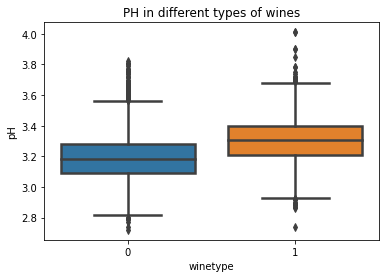

In [ ]:
sns.boxplot(x='winetype', y='pH', data=df_wine,linewidth=2.5,labels = ['winetype'])
plt.title('PH in different types of wines')
# left (0) is white
# right (1) is white

## 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [34]:
# Split data in training and test set

y = df_wine['winetype']
X = df_wine.loc[:, df_wine.columns != 'winetype']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Unscaled:

### Logistic Regression & cross-validation

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e90).fit(X_train, y_train)

#print("logreg .coef_: {}".format(logreg .coef_))
print("The training dataset has score: {:.3f}".format(logreg.score(X_train, y_train)))
print("The test dataset has score: {:.3f}".format(logreg.score(X_test, y_test)))
print("K-Fold:\n{}".format(cross_val_score(logreg, X_train,y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))


The training dataset has score: 0.982
The test dataset has score: 0.976
K-Fold:
[0.97333333 0.98358974 0.98870637 0.97741273 0.9835729 ]
The mean of K-Fold:
0.9813230137419049


### Penalized Logistic Regression & cross-validation

In [36]:
logreg_pen = LogisticRegression(C=5,penalty = 'l2',solver = 'liblinear').fit(X_train, y_train)

#print("logreg_pen .coef_: {}".format(logreg_pen .coef_))
print("The training dataset has score: {:.3f}".format(logreg_pen.score(X_train, y_train)))
print("The test dataset has score: {:.3f}".format(logreg_pen.score(X_test, y_test)))
print("K-Fold:\n{}".format(cross_val_score(logreg_pen, X_train,y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(logreg_pen, X_train, y_train, cv=kfold))))


The training dataset has score: 0.986
The test dataset has score: 0.980
K-Fold:
[0.98153846 0.99179487 0.99075975 0.98049281 0.98665298]
The mean of K-Fold:
0.9862477754962355


### KNN classification & cross-validation

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifer = KNeighborsClassifier().fit(X_train, y_train)

print("The training dataset has score: {:.3f}".format(knn_classifer.score(X_train, y_train)))
print("The test dataset has score: {:.3f}".format(knn_classifer.score(X_test, y_test)))
print("K-Fold:\n{}".format(cross_val_score(knn_classifer, X_train,y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(knn_classifer, X_train, y_train, cv=kfold))))


The training dataset has score: 0.957
The test dataset has score: 0.938
K-Fold:
[0.93948718 0.9425641  0.95379877 0.92607803 0.94661191]
The mean of K-Fold:
0.941707997683357


### How different is the result:

Logistic Regression (98.1%) and Penalized Logistic Regression (L1, accuracy: 98.6%) have higher accuracy than the KNN classifier (94.2%) when using k-fold (default) cross validation method. 

### Scaled Data:

In [38]:
scaler = StandardScaler().fit(X_train)
X_train_scaled_q2 = scaler.transform(X_train)   
X_test_scaled_q2 = scaler.transform(X_test) 

### Logistic Regression & Scaled Data

In [39]:

logreg = LogisticRegression(C=1e90).fit(X_train_scaled_q2, y_train)

#print("logreg .coef_: {}".format(logreg .coef_))
print("The training dataset has score: {:.3f}".format(logreg.score(X_train_scaled_q2, y_train)))
print("The test dataset has score: {:.3f}".format(logreg.score(X_test_scaled_q2, y_test)))
print("K-Fold:\n{}".format(cross_val_score(logreg, X_train_scaled_q2,y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(logreg, X_train_scaled_q2, y_train, cv=kfold))))


The training dataset has score: 0.994
The test dataset has score: 0.991
K-Fold:
[0.98974359 0.99589744 0.99486653 0.99486653 0.99589322]
The mean of K-Fold:
0.9942534618017163


### Standardization Improved the result

## Penalized Logistic Regression & Scaled Data

In [40]:
logreg_pen = LogisticRegression(C=5,penalty = 'l2',solver = 'liblinear').fit(X_train_scaled_q2, y_train)

#print("logreg_pen .coef_: {}".format(logreg_pen .coef_))
print("The training dataset has score: {:.3f}".format(logreg_pen.score(X_train_scaled_q2, y_train)))
print("The test dataset has score: {:.3f}".format(logreg_pen.score(X_test_scaled_q2, y_test)))
print("K-Fold:\n{}".format(cross_val_score(logreg_pen, X_train_scaled_q2,y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(logreg_pen, X_train_scaled_q2, y_train, cv=kfold))))


The training dataset has score: 0.994
The test dataset has score: 0.991
K-Fold:
[0.98974359 0.99589744 0.99589322 0.99486653 0.99589322]
The mean of K-Fold:
0.9944588006107512


### Standardization Improved the result slightly

### KNN Classification & Scaled Data

In [41]:
knn_classifer = KNeighborsClassifier().fit(X_train_scaled_q2, y_train)

print("The training dataset has score: {:.3f}".format(knn_classifer.score(X_train_scaled_q2, y_train)))
print("The test dataset has score: {:.3f}".format(knn_classifer.score(X_test_scaled_q2, y_test)))
print("K-Fold:\n{}".format(cross_val_score(knn_classifer, X_train_scaled_q2,y_train, cv=kfold)))
print("The mean of K-Fold:\n{}".format(np.mean(cross_val_score(knn_classifer, X_train_scaled_q2, y_train, cv=kfold))))


The training dataset has score: 0.995
The test dataset has score: 0.989
K-Fold:
[0.99076923 0.99589744 0.99281314 0.98767967 0.99383984]
The mean of K-Fold:
0.9921998631074607


### Standardization Improved the result

# 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

### Logistic Regression

In [45]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
logreg_param_grid = {'logisticregression__C': np.logspace(-3, 3, 10)}

logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid).fit(X_train_scaled_q2, y_train)


print("The best parameter is: \n{}".format(logreg_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(logreg_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'logisticregression__C': 10.0}
The best parameter provides test score: 
0.9914


Compared to above, did not improve the accuracy (similar)

Penalized Logistic Regression

In [52]:
log_reg_pen_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))
log_reg_pen_param_grid = {'logisticregression__C': np.logspace(-3,3,10)}
log_reg_pen_grid = GridSearchCV(log_reg_pen_pipe, log_reg_pen_param_grid).fit(X_train_scaled_q2, y_train)

print("The best parameter is: \n{}".format(log_reg_pen_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(log_reg_pen_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'logisticregression__C': 10.0}
The best parameter provides test score: 
0.9914


Compared to above, did not improve the accuracy (similar)

KNN Classification

In [53]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_param_grid = {'kneighborsclassifier__n_neighbors': np.arange(0, 27, 3)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid).fit(X_train_scaled_q2, y_train)

print("The best parameter is: \n{}".format(knn_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(knn_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'kneighborsclassifier__n_neighbors': 9}
The best parameter provides test score: 
0.9895


Compared to above, did not improve the accuracy (similar, slightly dropped).

# 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

Random State is 42

In [56]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

Logistic Regression

In [ ]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
logreg_param_grid = {'logisticregression__C': np.logspace(-3, 3, 10)}

logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid, cv = rkf).fit(X_train_scaled_q2, y_train)

print("The best parameter is: \n{}".format(logreg_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(logreg_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'logisticregression__C': 2.154434690031882}
The best parameter provides test score: 
0.9908


After shuffling the k-fold, the parameter changed from 10 to 2.154

Penalized Logistic Regression

In [64]:
log_pen_reg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

logreg_param_grid = {'logisticregression__C':np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_pen_reg_pipe, param_grid = logreg_param_grid, cv = rkf)
logreg_grid.fit(X_train_scaled_q2, y_train)
print("The best parameter is: \n{}".format(logreg_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(logreg_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'logisticregression__C': 2.154434690031882}
The best parameter provides test score: 
0.9908


After shuffling the k-fold, the parameter changed from 10.0 to 2.15

In [65]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_param_grid = {'kneighborsclassifier__n_neighbors': np.arange(0, 27, 3)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf).fit(X_train_scaled_q2, y_train)

print("The best parameter is: \n{}".format(knn_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(knn_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'kneighborsclassifier__n_neighbors': 12}
The best parameter provides test score: 
0.9902


After shuffling the k-fold, the parameter changed from 9 to 12

### Change the random state from 42 to 73 (Repeated K-FOLD)

In [66]:
rkf_new = RepeatedKFold(n_splits=10, n_repeats=5, random_state=73)

Logistic Regression

In [67]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
logreg_param_grid = {'logisticregression__C': np.logspace(-3, 3, 10)}

logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid, cv = rkf_new).fit(X_train_scaled_q2, y_train)

print("The best parameter is: \n{}".format(logreg_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(logreg_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'logisticregression__C': 215.44346900318823}
The best parameter provides test score: 
0.9914


After changed the random state, the parameter changed from 2.15 to 215.44

Penalized Logistc Regression

In [68]:
#solvers = ['liblinear']
#penalty = ['l1', 'l2']
log_pen_reg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

#logreg_param_grid = dict(solver=solvers,penalty=penalty, C=np.logspace(-3, 3, 10))
logreg_grid = GridSearchCV(log_pen_reg_pipe, param_grid = logreg_param_grid, cv = rkf_new)
logreg_grid.fit(X_train_scaled_q2, y_train)
print("The best parameter is: \n{}".format(logreg_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(logreg_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'logisticregression__C': 215.44346900318823}
The best parameter provides test score: 
0.9914


After changed the random state, the parameter changed from 2.15 to 215.44

KNN Classification

In [ ]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_param_grid = {'kneighborsclassifier__n_neighbors': np.arange(0, 27, 3)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf_new).fit(X_train_scaled_q2, y_train)

print("The best parameter is: \n{}".format(knn_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(knn_grid.score(X_test_scaled_q2, y_test)))

The best parameter is: 
{'kneighborsclassifier__n_neighbors': 12}
The best parameter provides test score: 
0.9902


After changed the random state, the parameter did not change (still 12)

### change the random state of the split into training and test data

In [72]:
# Split data in training and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=73) 


In [73]:
# standardization
scaler = StandardScaler().fit(X_train1)
X_train_scaled2 = scaler.transform(X_train1)   
X_test_scaled2 = scaler.transform(X_test1)   

Logistic Regression changed random state (train-split):

In [ ]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
logreg_param_grid = {'logisticregression__C': np.logspace(-3, 3, 10)}

logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid, cv = rkf_new).fit(X_train_scaled2, y_train1)

print("The best parameter is: \n{}".format(logreg_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(logreg_grid.score(X_test_scaled2, y_test1)))

The best parameter is: 
{'logisticregression__C': 46.41588833612773}
The best parameter provides test score: 
0.9914


The parameter changed from 215.44 to 46.41

Penalized Logistic Regression changed random state (train-split):

In [74]:
#solvers = ['liblinear']
#penalty = ['l1', 'l2']
#logreg_param_grid = dict(solver=solvers,penalty=penalty, C=np.logspace(-3, 3, 10))
log_pen_reg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))
logreg_grid = GridSearchCV(log_pen_reg_pipe, param_grid = logreg_param_grid, cv = rkf_new)
logreg_grid.fit(X_train_scaled2, y_train1)
print("The best parameter is: \n{}".format(logreg_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(logreg_grid.score(X_test_scaled2, y_test1)))

The best parameter is: 
{'logisticregression__C': 46.41588833612773}
The best parameter provides test score: 
0.9914


The parameter changed from 215.44 to 46.41

KNN Classification changed random state (train-split):

In [ ]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_param_grid = {'kneighborsclassifier__n_neighbors': np.arange(0, 27, 3)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf_new).fit(X_train_scaled2, y_train1)

print("The best parameter is: \n{}".format(knn_grid.best_params_))
print("The best parameter provides test score: \n{:.4f}".format(knn_grid.score(X_test_scaled2, y_test1)))

The best parameter is: 
{'kneighborsclassifier__n_neighbors': 3}
The best parameter provides test score: 
0.9895


The parameter changed from 12 to 3

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

Below are the coefficients from two models (Logistic Regression and Penalized Logistic Regression, after standardized the dataset):

In [ ]:
coef_df_logistic = pd.DataFrame(data = logreg .coef_, columns = X_train.columns, index = ['Logistic Regression'])
coef_df_logistic_pen = pd.DataFrame(data = logreg_pen .coef_, columns = X_train.columns, index = ['Penalized Logistic Regression'])

pd.concat([coef_df_logistic, coef_df_logistic_pen], axis=0)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression,0.235936,1.589745,-0.286582,-4.938087,0.792480,1.298408,-3.181798,4.532073,0.020461,0.628392,1.512308,0.346559
Penalized Logistic Regression,0.865171,11.370899,0.174906,-0.167133,5.582229,0.054785,-0.066448,-7.418090,3.869091,8.025509,-0.813367,-0.003709


#### Answer:
1. The two models (Logistic Regression and Penalized Logistic Regression with L2 penalty) were trained by standardized data (with default cross-validation). The penalized model has test-score: 99.1%, and 99.4% k-fold). The logistic regression has similar test-score: 99.1% and 99.4%. We cannot tell which model is better from the accuracy score.
 
2.1 The penalized logistic regression put shrink on the features' coefficients. By looking at the coefficients of penalized logistic regression, we can see the **volatile acidity**, **chlorides** and **sulphates** are having strong positive association with wine type, and **density** as a strong negative relationship with wine type.

For example, the coefficients of **volatile acidity** is much higher in the penalized logistic regression than the logistic regression.
 
2.2 The coefficients of logistic regression have less variation than the coefficients of the penalized logistic regression. This is coherent with the "shrink" effect of penalized logistic regression.
 
2.3 After comparing the coefficients, penalized logistic regression could better highlight the important features. In conclusion, based on the current data, penalized logistic regression is the better choice.
 
 
 
 
 
 
 
 

